# Black Friday Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
import pandas_gbq

## Initialize Configuration

In [2]:
PROJECT = "aa-ai-specialisation"
BIGQUERY_DATASET="black_friday"

# Initialize a BigQuery client
client = bigquery.Client(project=PROJECT)

## Read the Dataset from BigQuery Table

- We could read the dataset from BigQuery table with 'magic command'
- Or we could do this using the BigQuery python SDK

In [3]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [4]:
%%bigquery train_df
SELECT * FROM `aa-ai-specialisation.black_friday.train`

Query is running:   0%|          |

Downloading:   0%|          |

In [5]:
%%bigquery test_df
SELECT * FROM `aa-ai-specialisation.black_friday.test`

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1003521,P00350942,M,26-35,0,B,3,0,3,4,5,10718
1,1003521,P00117442,M,26-35,0,B,3,0,5,14,<NA>,8643
2,1003521,P00295942,M,26-35,0,B,3,0,2,5,15,13002
3,1003521,P00089442,M,26-35,0,B,3,0,8,<NA>,<NA>,9784
4,1003521,P00086042,M,26-35,0,B,3,0,8,14,17,9764
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1003261,P00066242,M,46-50,20,B,1,1,1,2,5,3865
550064,1003261,P00012242,M,46-50,20,B,1,1,2,4,9,3446
550065,1003261,P00251642,M,46-50,20,B,1,1,1,2,4,4158
550066,1003261,P00087442,M,46-50,20,B,1,1,5,<NA>,<NA>,7111


In [7]:
test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1003521,P00252542,M,26-35,0,B,3,0,8,<NA>,<NA>
1,1003521,P00221442,M,26-35,0,B,3,0,1,2,5
2,1003521,P00003442,M,26-35,0,B,3,0,4,5,8
3,1003521,P00254342,M,26-35,0,B,3,0,5,11,<NA>
4,1003521,P00233542,M,26-35,0,B,3,0,1,15,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
233594,1003261,P00073042,M,46-50,20,B,1,1,8,<NA>,<NA>
233595,1003261,P00154042,M,46-50,20,B,1,1,1,2,15
233596,1003261,P00021942,M,46-50,20,B,1,1,8,16,<NA>
233597,1003261,P00085942,M,46-50,20,B,1,1,2,4,8


In [8]:
print(len(train_df),len(test_df))

550068 233599


In [9]:
# train_query = """
# SELECT * FROM aa-ai-specialisation.black_friday.train
# """
# query_job = client.query(train_query)
# train_df = query_job.to_dataframe()

In [10]:
# test_query = """
# SELECT * FROM aa-ai-specialisation.black_friday.train
# """
# query_job = client.query(test_query)
# test_df = query_job.to_dataframe()

## Basic Overview of the Black Friday Dataset

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  Int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  Int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  Int64 
 8   Product_Category_1          550068 non-null  Int64 
 9   Product_Category_2          376430 non-null  Int64 
 10  Product_Category_3          166821 non-null  Int64 
 11  Purchase                    550068 non-null  Int64 
dtypes: Int64(7), object(5)
memory usage: 54.0+ MB


In [12]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1003521,P00350942,M,26-35,0,B,3,0,3,4,5,10718
1,1003521,P00117442,M,26-35,0,B,3,0,5,14,<NA>,8643
2,1003521,P00295942,M,26-35,0,B,3,0,2,5,15,13002
3,1003521,P00089442,M,26-35,0,B,3,0,8,<NA>,<NA>,9784
4,1003521,P00086042,M,26-35,0,B,3,0,8,14,17,9764
5,1003521,P00087642,M,26-35,0,B,3,0,5,14,<NA>,5237
6,1003521,P00331542,M,26-35,0,B,3,0,5,8,<NA>,7023
7,1003521,P00275742,M,26-35,0,B,3,0,8,16,<NA>,9812
8,1003521,P00086442,M,26-35,0,B,3,0,8,13,15,7904
9,1003521,P00331342,M,26-35,0,B,3,0,8,16,<NA>,7833


### Get Unique Values
This will give us an initial idea of how many unique classes there are for each categorical column, which is helpful to show the feature distribution later for us.

In [14]:
#Get unique values
train_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [15]:
# To get the actual unique values for a specific column
checked_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 
                   'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for column in train_df[checked_columns]:
    print(f"Unique values in {column}:")
    print(train_df[column].unique())
    print("\n")

Unique values in Gender:
['M' 'F']


Unique values in Age:
['26-35' '55+' '18-25' '51-55' '0-17' '36-45' '46-50']


Unique values in Occupation:
<IntegerArray>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Length: 21, dtype: Int64


Unique values in City_Category:
['B' 'A' 'C']


Unique values in Stay_In_Current_City_Years:
['3' '2' '4+' '1' '0']


Unique values in Marital_Status:
<IntegerArray>
[0, 1]
Length: 2, dtype: Int64


Unique values in Product_Category_1:
<IntegerArray>
[3, 5, 2, 8, 1, 11, 10, 15, 16, 18, 7, 12, 6, 13, 4, 14, 20, 19, 17, 9]
Length: 20, dtype: Int64


Unique values in Product_Category_2:
<IntegerArray>
[4, 14, 5, <NA>, 8, 16, 13, 9, 2, 17, 11, 12, 15, 10, 6, 7, 18, 3]
Length: 18, dtype: Int64


Unique values in Product_Category_3:
<IntegerArray>
[5, <NA>, 15, 17, 14, 12, 16, 8, 6, 9, 18, 10, 11, 13, 3, 4]
Length: 16, dtype: Int64




## Checking Null Values

In [16]:
#Check null values in train data
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Handle Missing Values
Based on the first glance of the data, it appears that the dataset has a significant number of missing values in the Product_Category_2 and Product_Category_3 columns. Here's how we can approach handling these missing values, especially considering that these are categorical variables.
1. Dropping columns directly

    If Product_Category_2 and Product_Category_3 are not critical to the analysis or predictive modeling, and given that they have a large number of missing values, we might consider dropping these columns altogether.

2. Replacing with Mode or a Constant (i.e. 0)

    We could replace the missing values with the mode (the most frequently occurring value in the column). This is a simple form of imputation that can work well if the most common category is significantly more frequent than others.

3. Imputing with Predictive Modeling

    We could build a baseline model and using it to predict the missing values is a more sophisticated method of imputation. It can potentially yield better results, especially if there are underlying patterns in the data that correlate with the product categories.

4. Apply Placeholder Stragtegy

    We could also assign a new category for missing values, treating "missing" as its own category. This can be useful if the fact a value is missing might itself be informative.

Therefore, according to above, we would do some further steps for making a decision:
- Feature distribution analysis
- MCAR, MAR or MNAR analysis (Missing Completely At Random or Missing At Random or Missing Not At Random)
- Correlation analysis
- Feature importance analysis (we could do this step after a baseline model is trained and come back)

### Feature Distribution Analysis

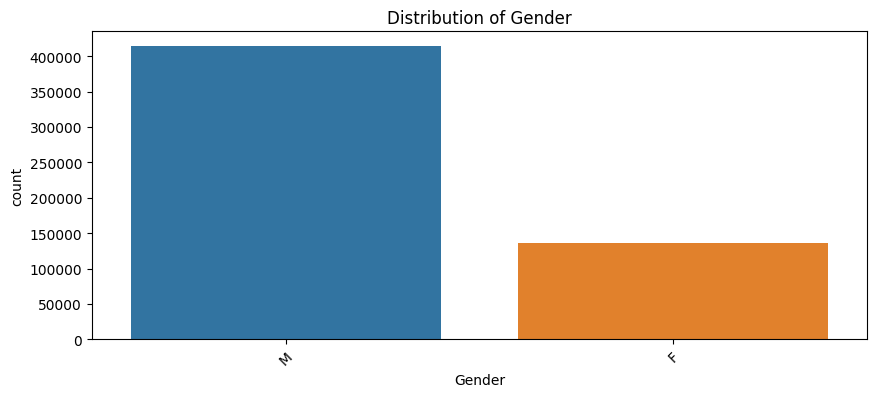

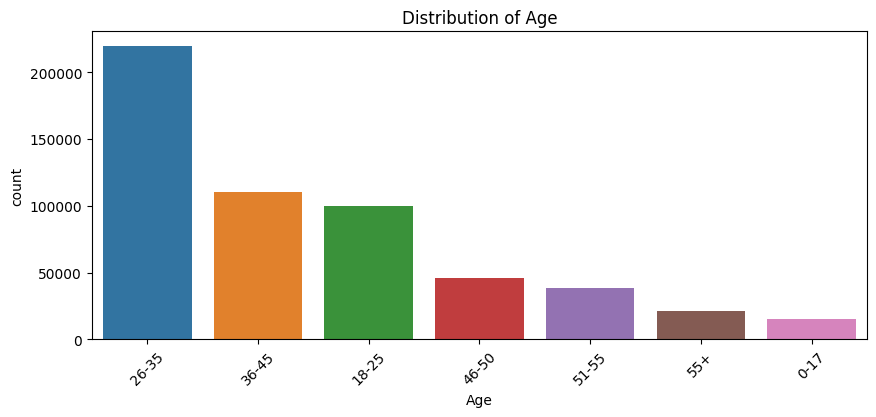

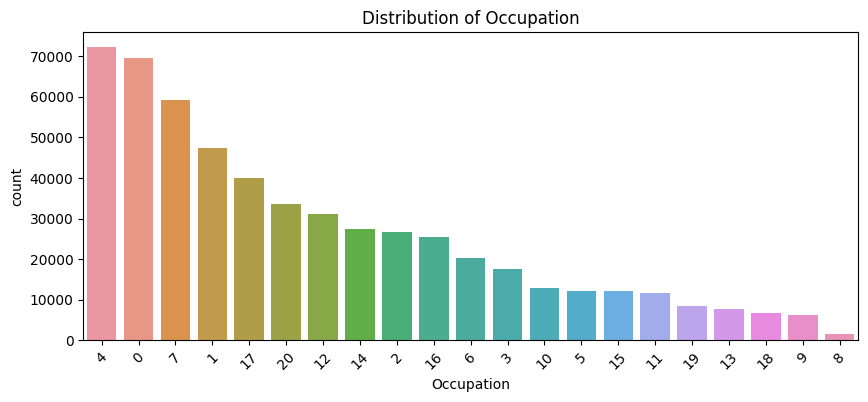

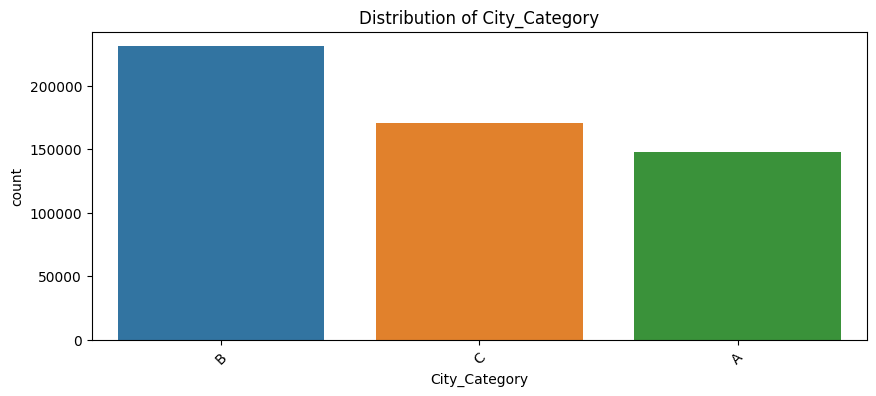

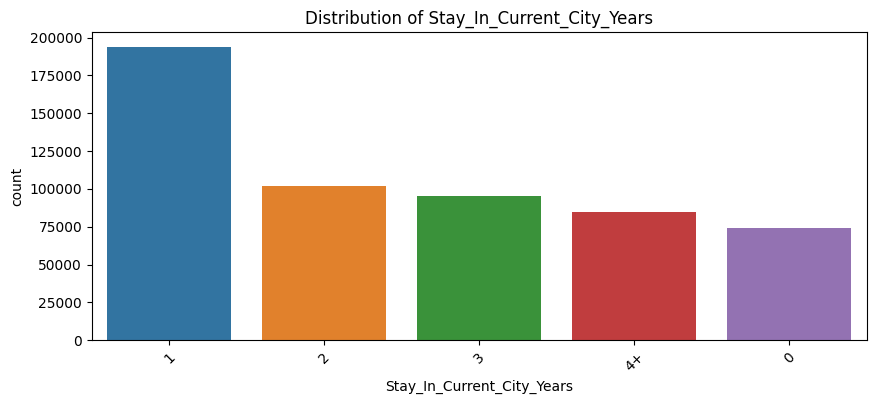

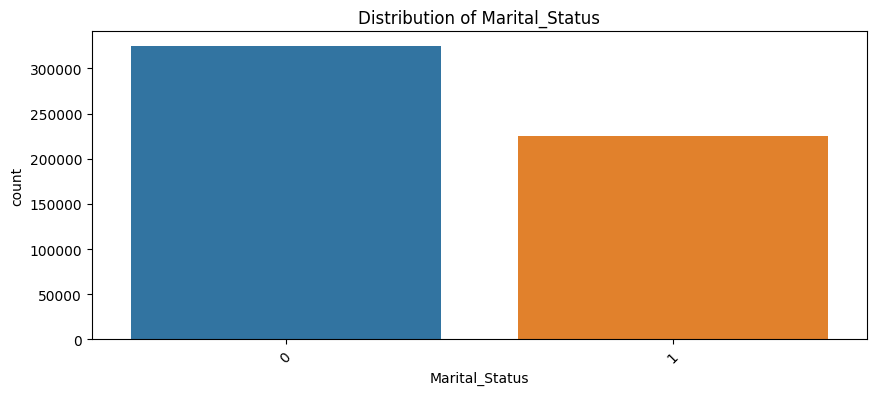

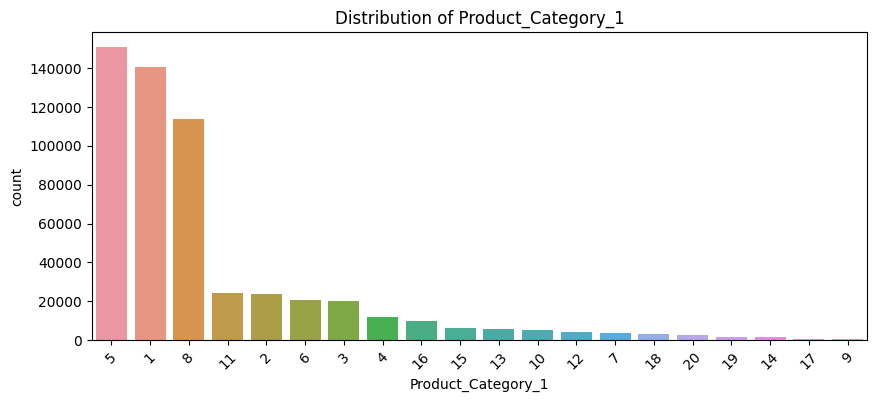

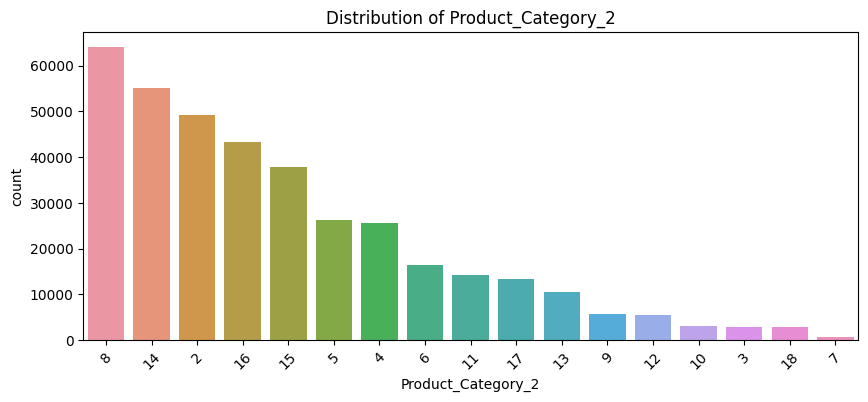

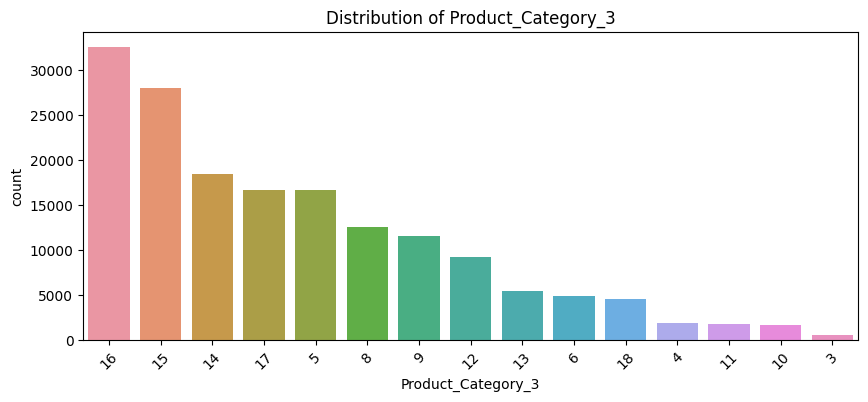

In [17]:
# List of columns to plot
columns_to_plot = ['Gender', 'Age', 'Occupation', 'City_Category', 
                   'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Plot distribution for each column for train dataset
for column in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_df, x=column, order = train_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

### Preprocessing Data
Before we do a further analysis and even feature engineering, we have to do some preprocessing for the data, because we notice that most columns of dataframe is shown with categorical data. For example, for the column 'Gender' it represents with "F" and "M", the column 'Age' is represented with different age classes ['26-35' '55+' '18-25' '51-55' '0-17' '36-45' '46-50'] and so on. Therefore, some necessary mappings are valuable

In [18]:
# Adding a missing indicator for Product_Category_2 and Product_Category_3
preprocessed_train_df = train_df.copy()
preprocessed_test_df = test_df.copy()

preprocessed_train_df['missing_Product_Category_2'] = preprocessed_train_df['Product_Category_2'].isnull().astype(int)
preprocessed_train_df['missing_Product_Category_3'] = preprocessed_train_df['Product_Category_3'].isnull().astype(int)

preprocessed_test_df['missing_Product_Category_2'] = preprocessed_test_df['Product_Category_2'].isnull().astype(int)
preprocessed_test_df['missing_Product_Category_3'] = preprocessed_test_df['Product_Category_3'].isnull().astype(int)
# Imput the missing value with constant 0
preprocessed_train_df['Product_Category_2'].fillna(0, inplace=True) 
preprocessed_train_df['Product_Category_3'].fillna(0, inplace=True)
# And also apply to test_df
preprocessed_test_df['Product_Category_2'].fillna(0, inplace=True) 
preprocessed_test_df['Product_Category_3'].fillna(0, inplace=True)

In [19]:
#Check null values in train data again
preprocessed_train_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
missing_Product_Category_2    0
missing_Product_Category_3    0
dtype: int64

In [20]:
preprocessed_test_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
missing_Product_Category_2    0
missing_Product_Category_3    0
dtype: int64

### MCAR, MAR or MNAR Analysis
This analysis important for us to have some insights that the data missing is random or not, is informative or not. If the data is missing not at random (MNAR), the imputation we did could be misleading. Even though it is bit challenging to determine which case it is, we could do some statistical tests to help make decisions

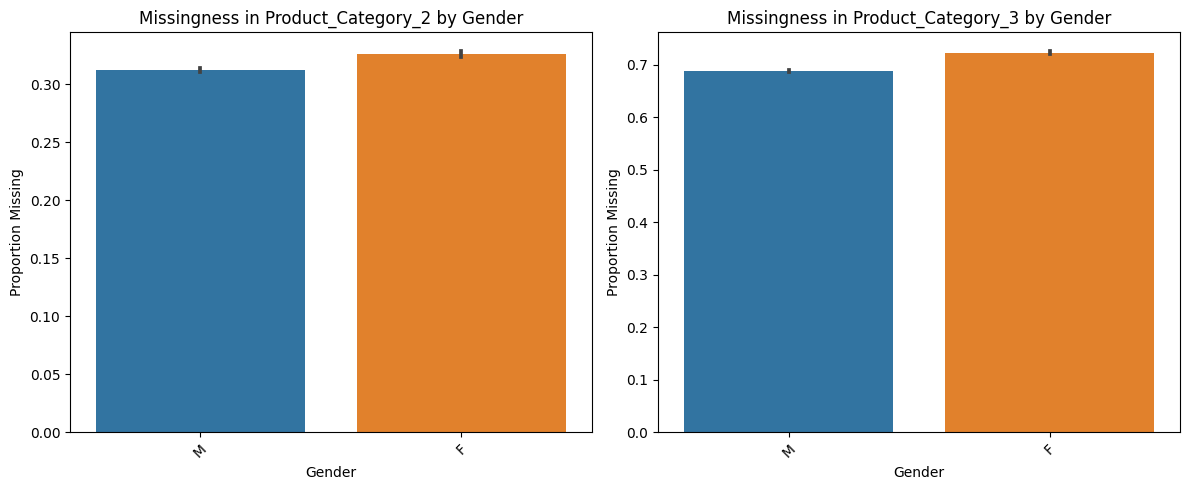

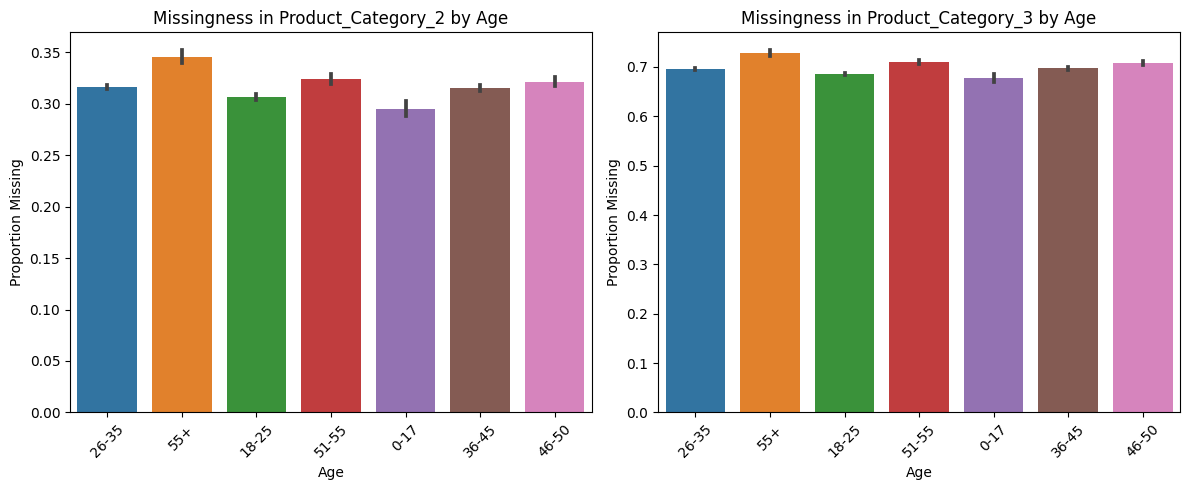

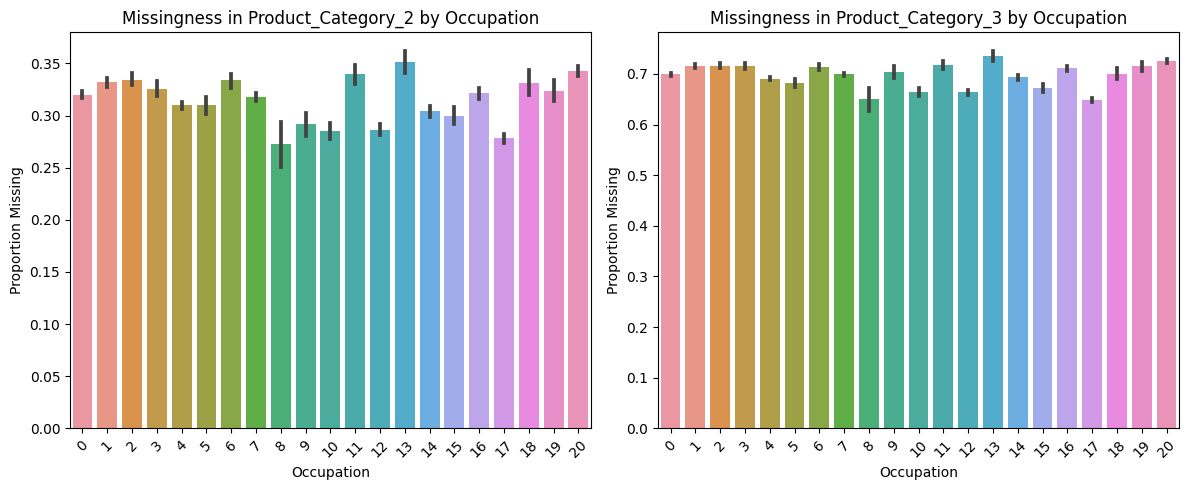

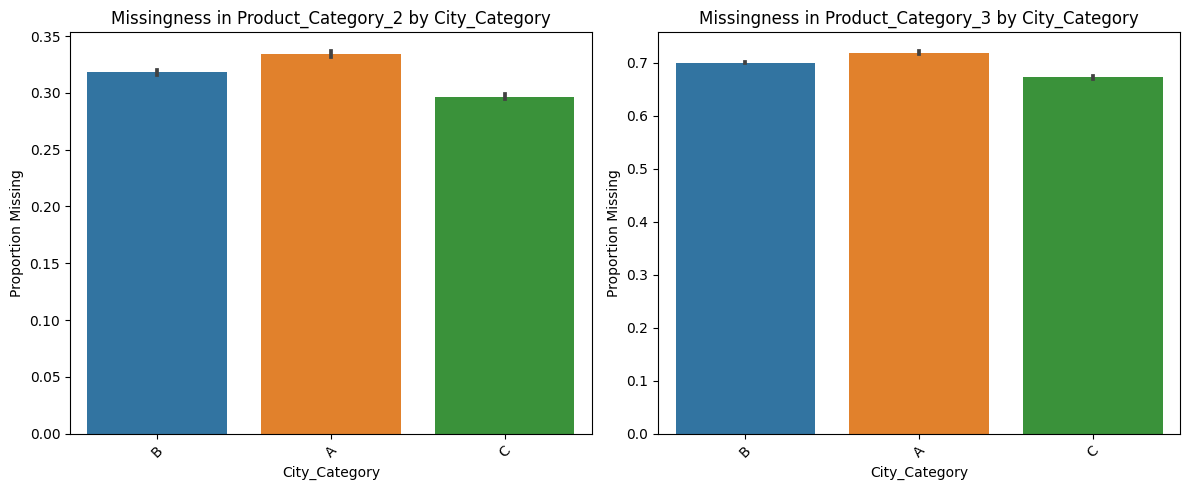

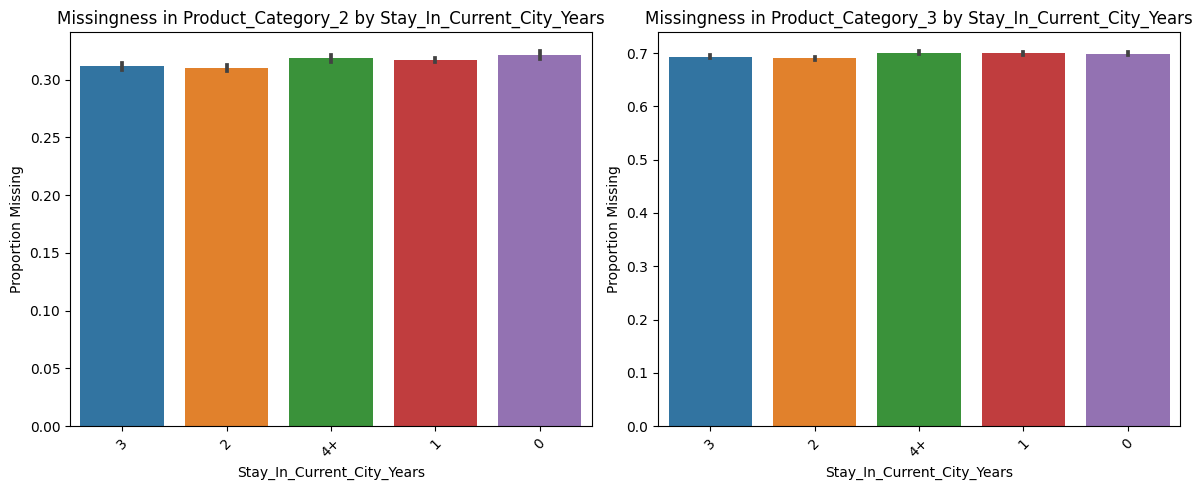

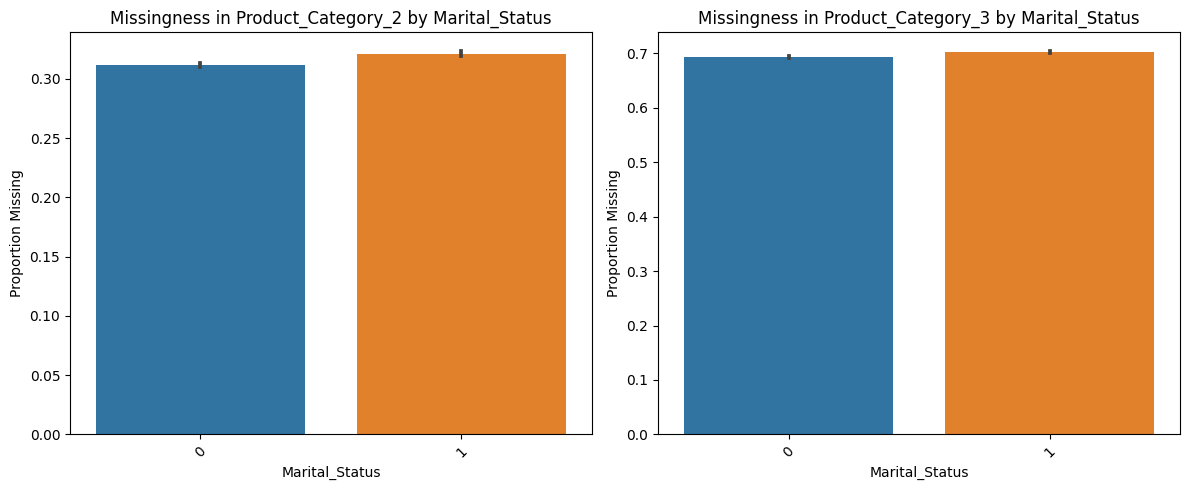

In [21]:
# Check if the missingness of one variable correlates with another
# Assuming some groups of columns

suspected_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 
                     'Stay_In_Current_City_Years', 'Marital_Status']

# Plotting each suspected column against the missingness of Product_Category_2 and Product_Category_3
for column in suspected_columns:
    plt.figure(figsize=(12, 5))

    # Plotting for Product_Category_2
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='missing_Product_Category_2', data=preprocessed_train_df)
    plt.title(f'Missingness in Product_Category_2 by {column}')
    plt.ylabel('Proportion Missing')
    plt.xticks(rotation=45)

    # Plotting for Product_Category_3
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='missing_Product_Category_3', data=preprocessed_train_df)
    plt.title(f'Missingness in Product_Category_3 by {column}')
    plt.ylabel('Proportion Missing')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [22]:
# Gender: Binary encode 'Gender'
preprocessed_train_df['Gender']=preprocessed_train_df['Gender'].map({'M': 0, 'F': 1})
preprocessed_test_df['Gender'] = preprocessed_test_df['Gender'].map({'M': 0, 'F': 1})

# Age: Ordinal encode 'Age'
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
preprocessed_train_df['Age'] = preprocessed_train_df['Age'].map(age_mapping)
preprocessed_test_df['Age'] = preprocessed_test_df['Age'].map(age_mapping)

# City_Category: One-hot encode 'City_Category'
train_city_category_dummies = pd.get_dummies(preprocessed_train_df['City_Category'], prefix='City').astype(int)
test_city_category_dummies = pd.get_dummies(preprocessed_test_df['City_Category'], prefix='City').astype(int)
preprocessed_train_df = pd.concat([preprocessed_train_df, train_city_category_dummies], axis=1)
preprocessed_test_df = pd.concat([preprocessed_test_df, test_city_category_dummies], axis=1)

# Stay_In_Current_City_Years: Replace '4+' with '4' and convert to integer
preprocessed_train_df['Stay_In_Current_City_Years'] = preprocessed_train_df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)
preprocessed_test_df['Stay_In_Current_City_Years'] = preprocessed_test_df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

# Drop the original categorical columns after encoding
preprocessed_train_df.drop(['City_Category'], axis=1, inplace=True)
preprocessed_test_df.drop(['City_Category'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


### Correlation Analysis

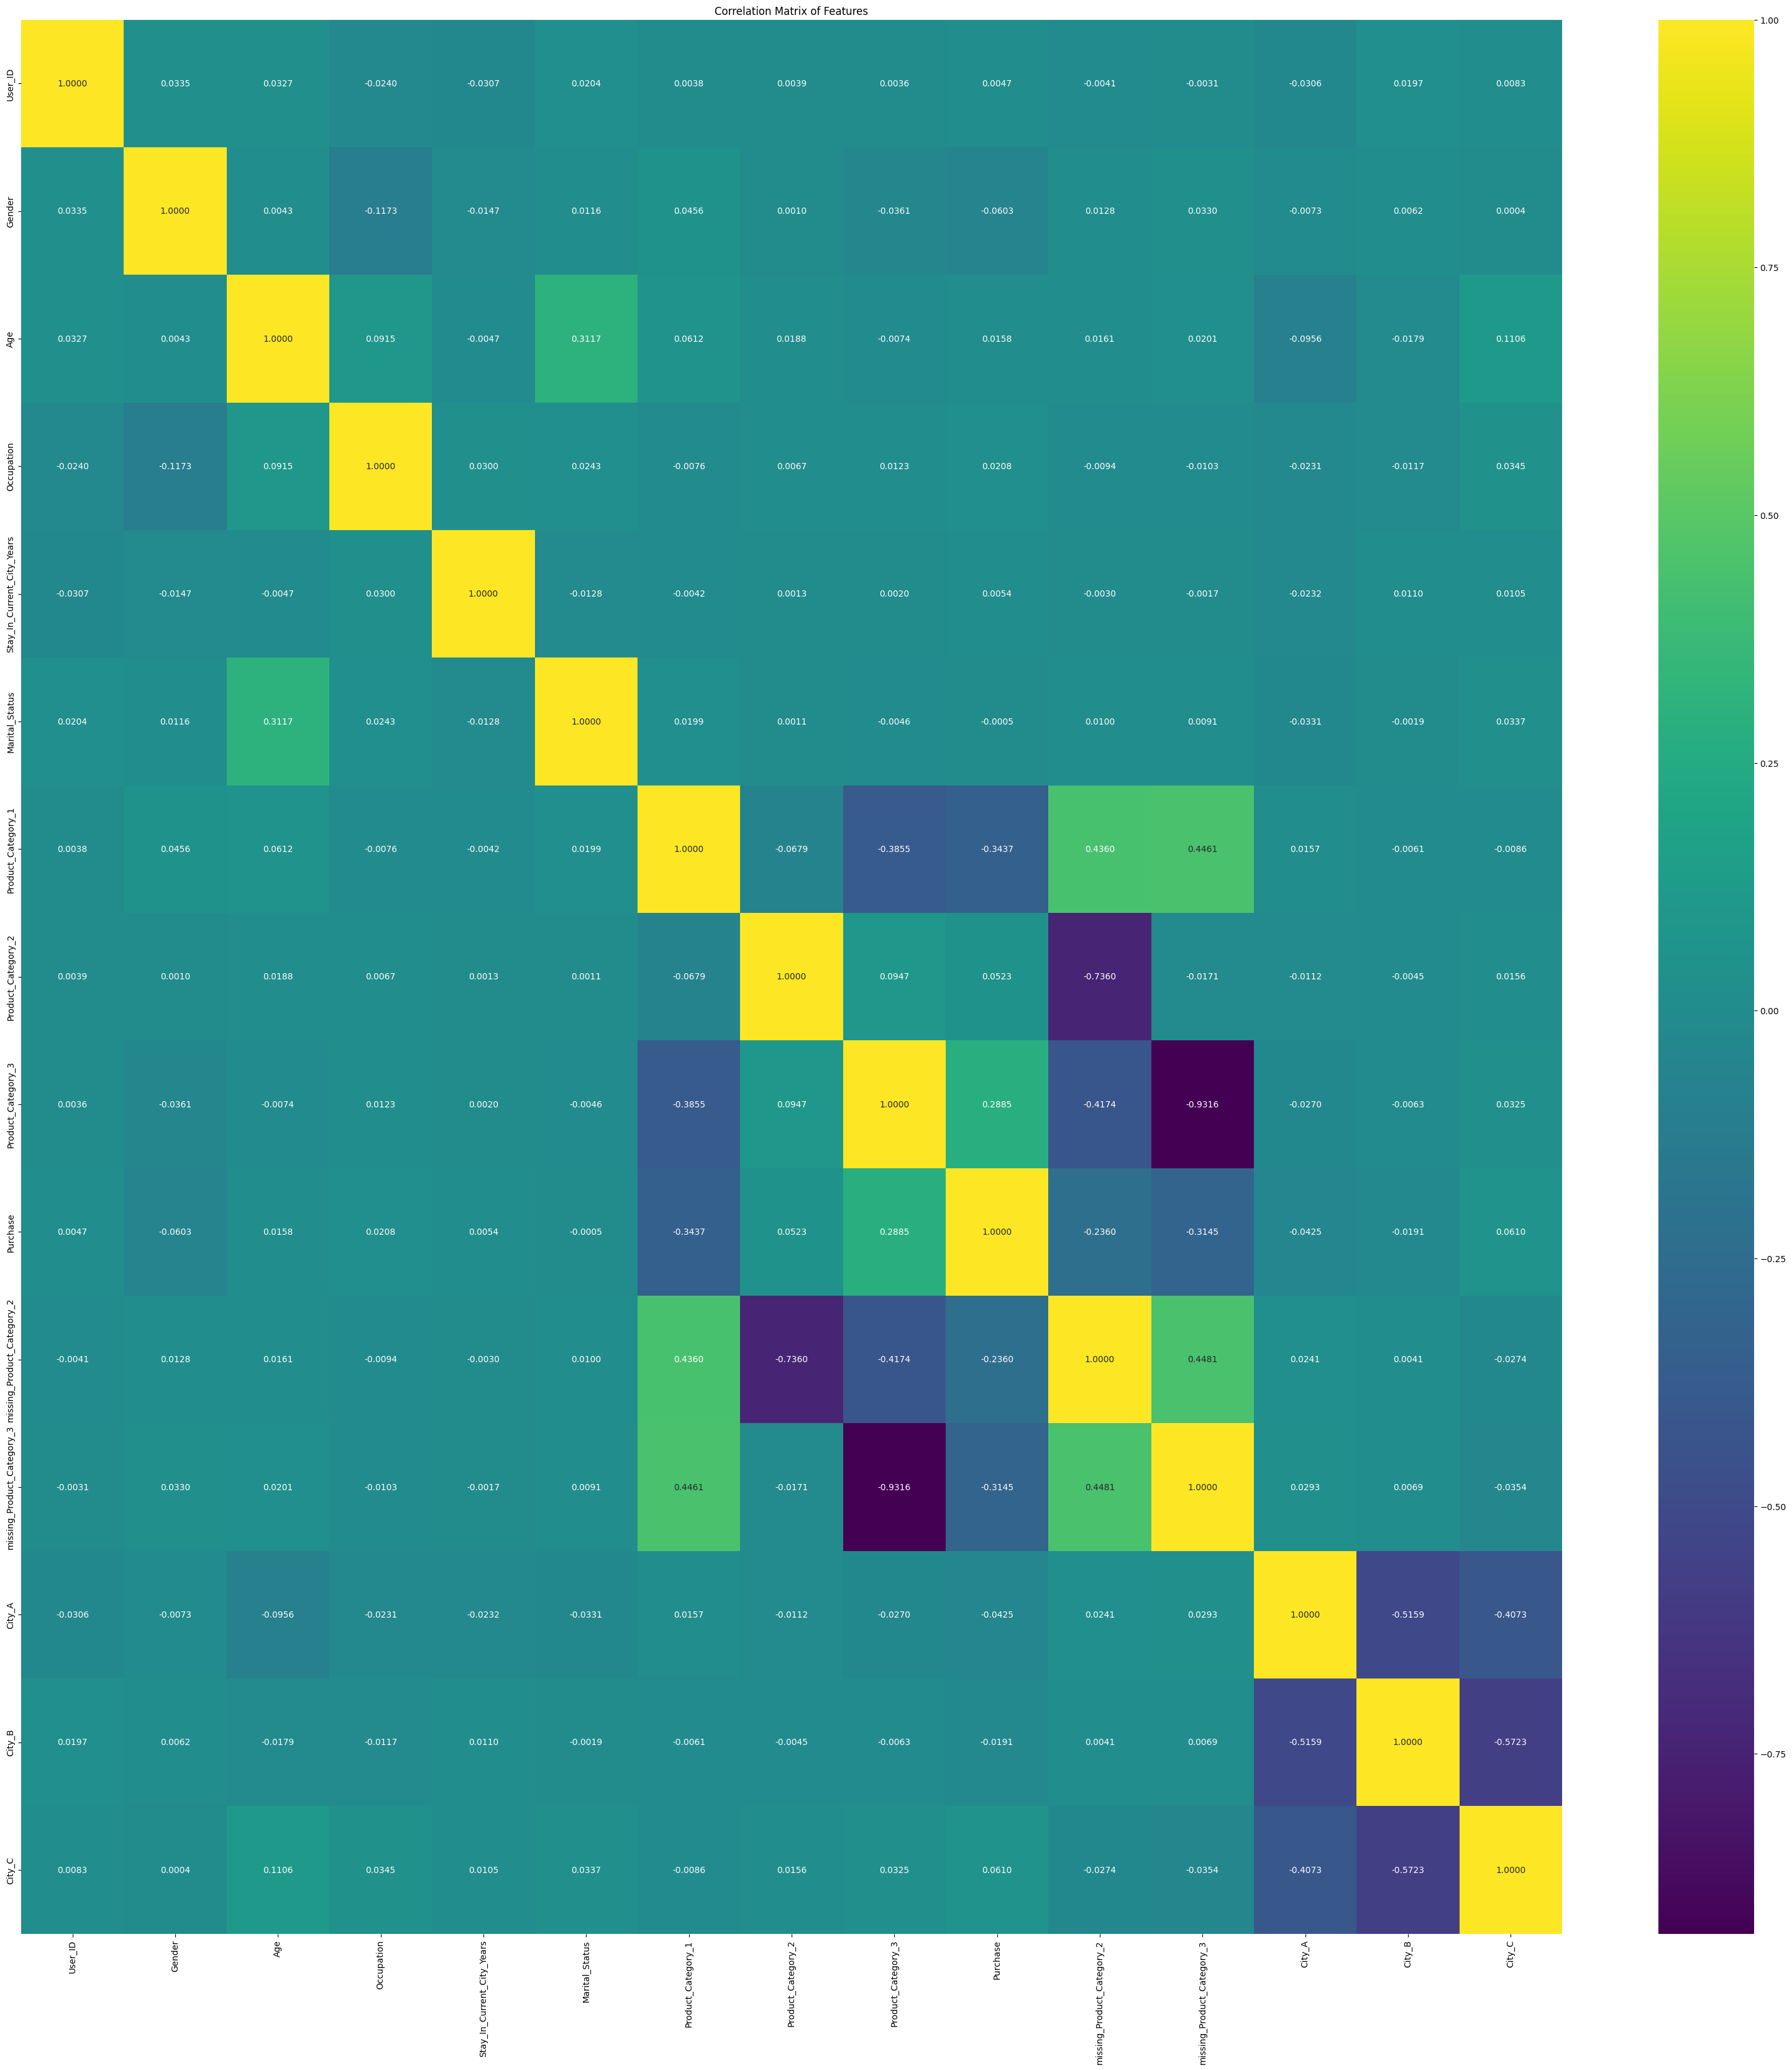

In [23]:
correlation_matrix = preprocessed_train_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.4f')
plt.title('Correlation Matrix of Features')
plt.show()

### Some Insights
The analysis of `Product_Category_2` and `Product_Category_23` reveals relatively low and consistent correlations with other features, which suggests that its missing data could be Missing At Random (MAR) or Missing Completely At Random (MCAR).Therefore, applying common imputation techniques, such as replacing missing values with the mode or a constant, appears justified and should not introduce substantial bias into the modeling process. However, we opt for a cautious approach by employing a placeholder value for imputation and creating an additional binary indicator for missingness. This method provides a safeguard by preserving the potential informational value of the missingness pattern, should it exist in a subtle form not captured by the correlation analysis.

## Other Visualization
- Note that in the distribution analysis, we found out the gender distribution is imbalanced in this dataset, the male has more stronger purchase power than female. We're interested to investigate how does the distribution looks like agaisnt with purchase, to check if it may raises bias
- Also, we want to have an overview of the purchase distribution looks like.

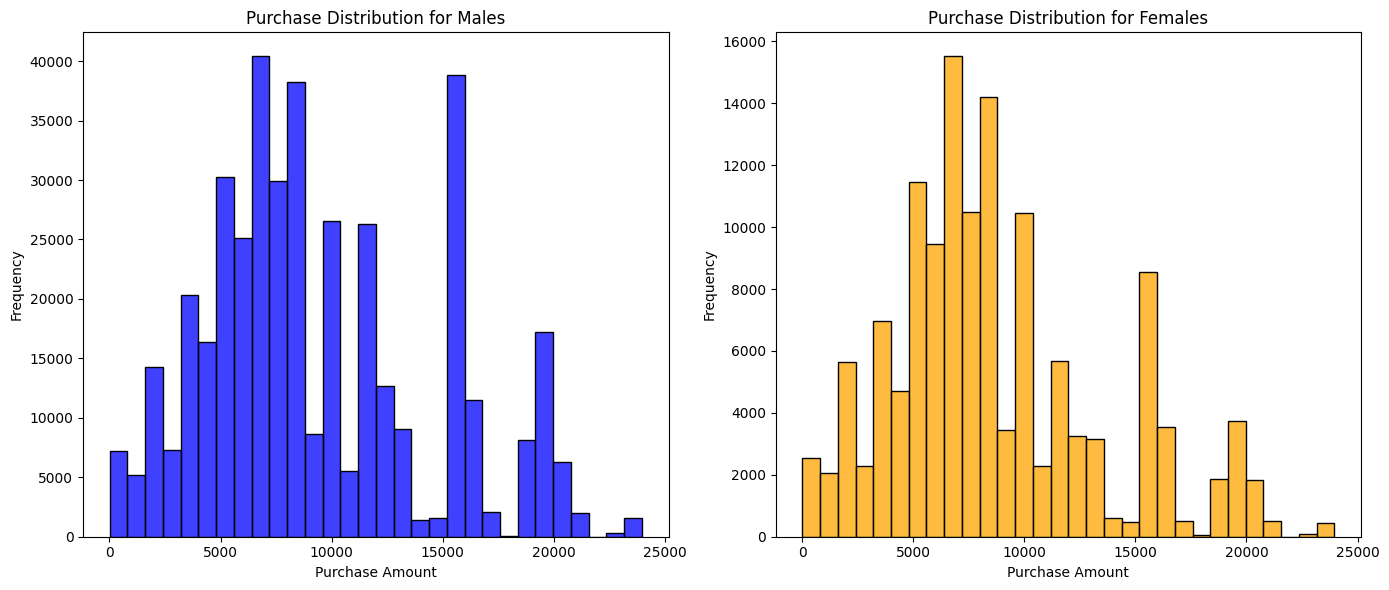

In [25]:
plt.figure(figsize=(14, 6))

# Plot for males
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_train_df[preprocessed_train_df['Gender'] == 0]['Purchase'], color='blue', bins=30)
plt.title('Purchase Distribution for Males')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Plot for females
plt.subplot(1, 2, 2)
sns.histplot(preprocessed_train_df[preprocessed_train_df['Gender'] == 1]['Purchase'], color='orange', bins=30)
plt.title('Purchase Distribution for Females')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


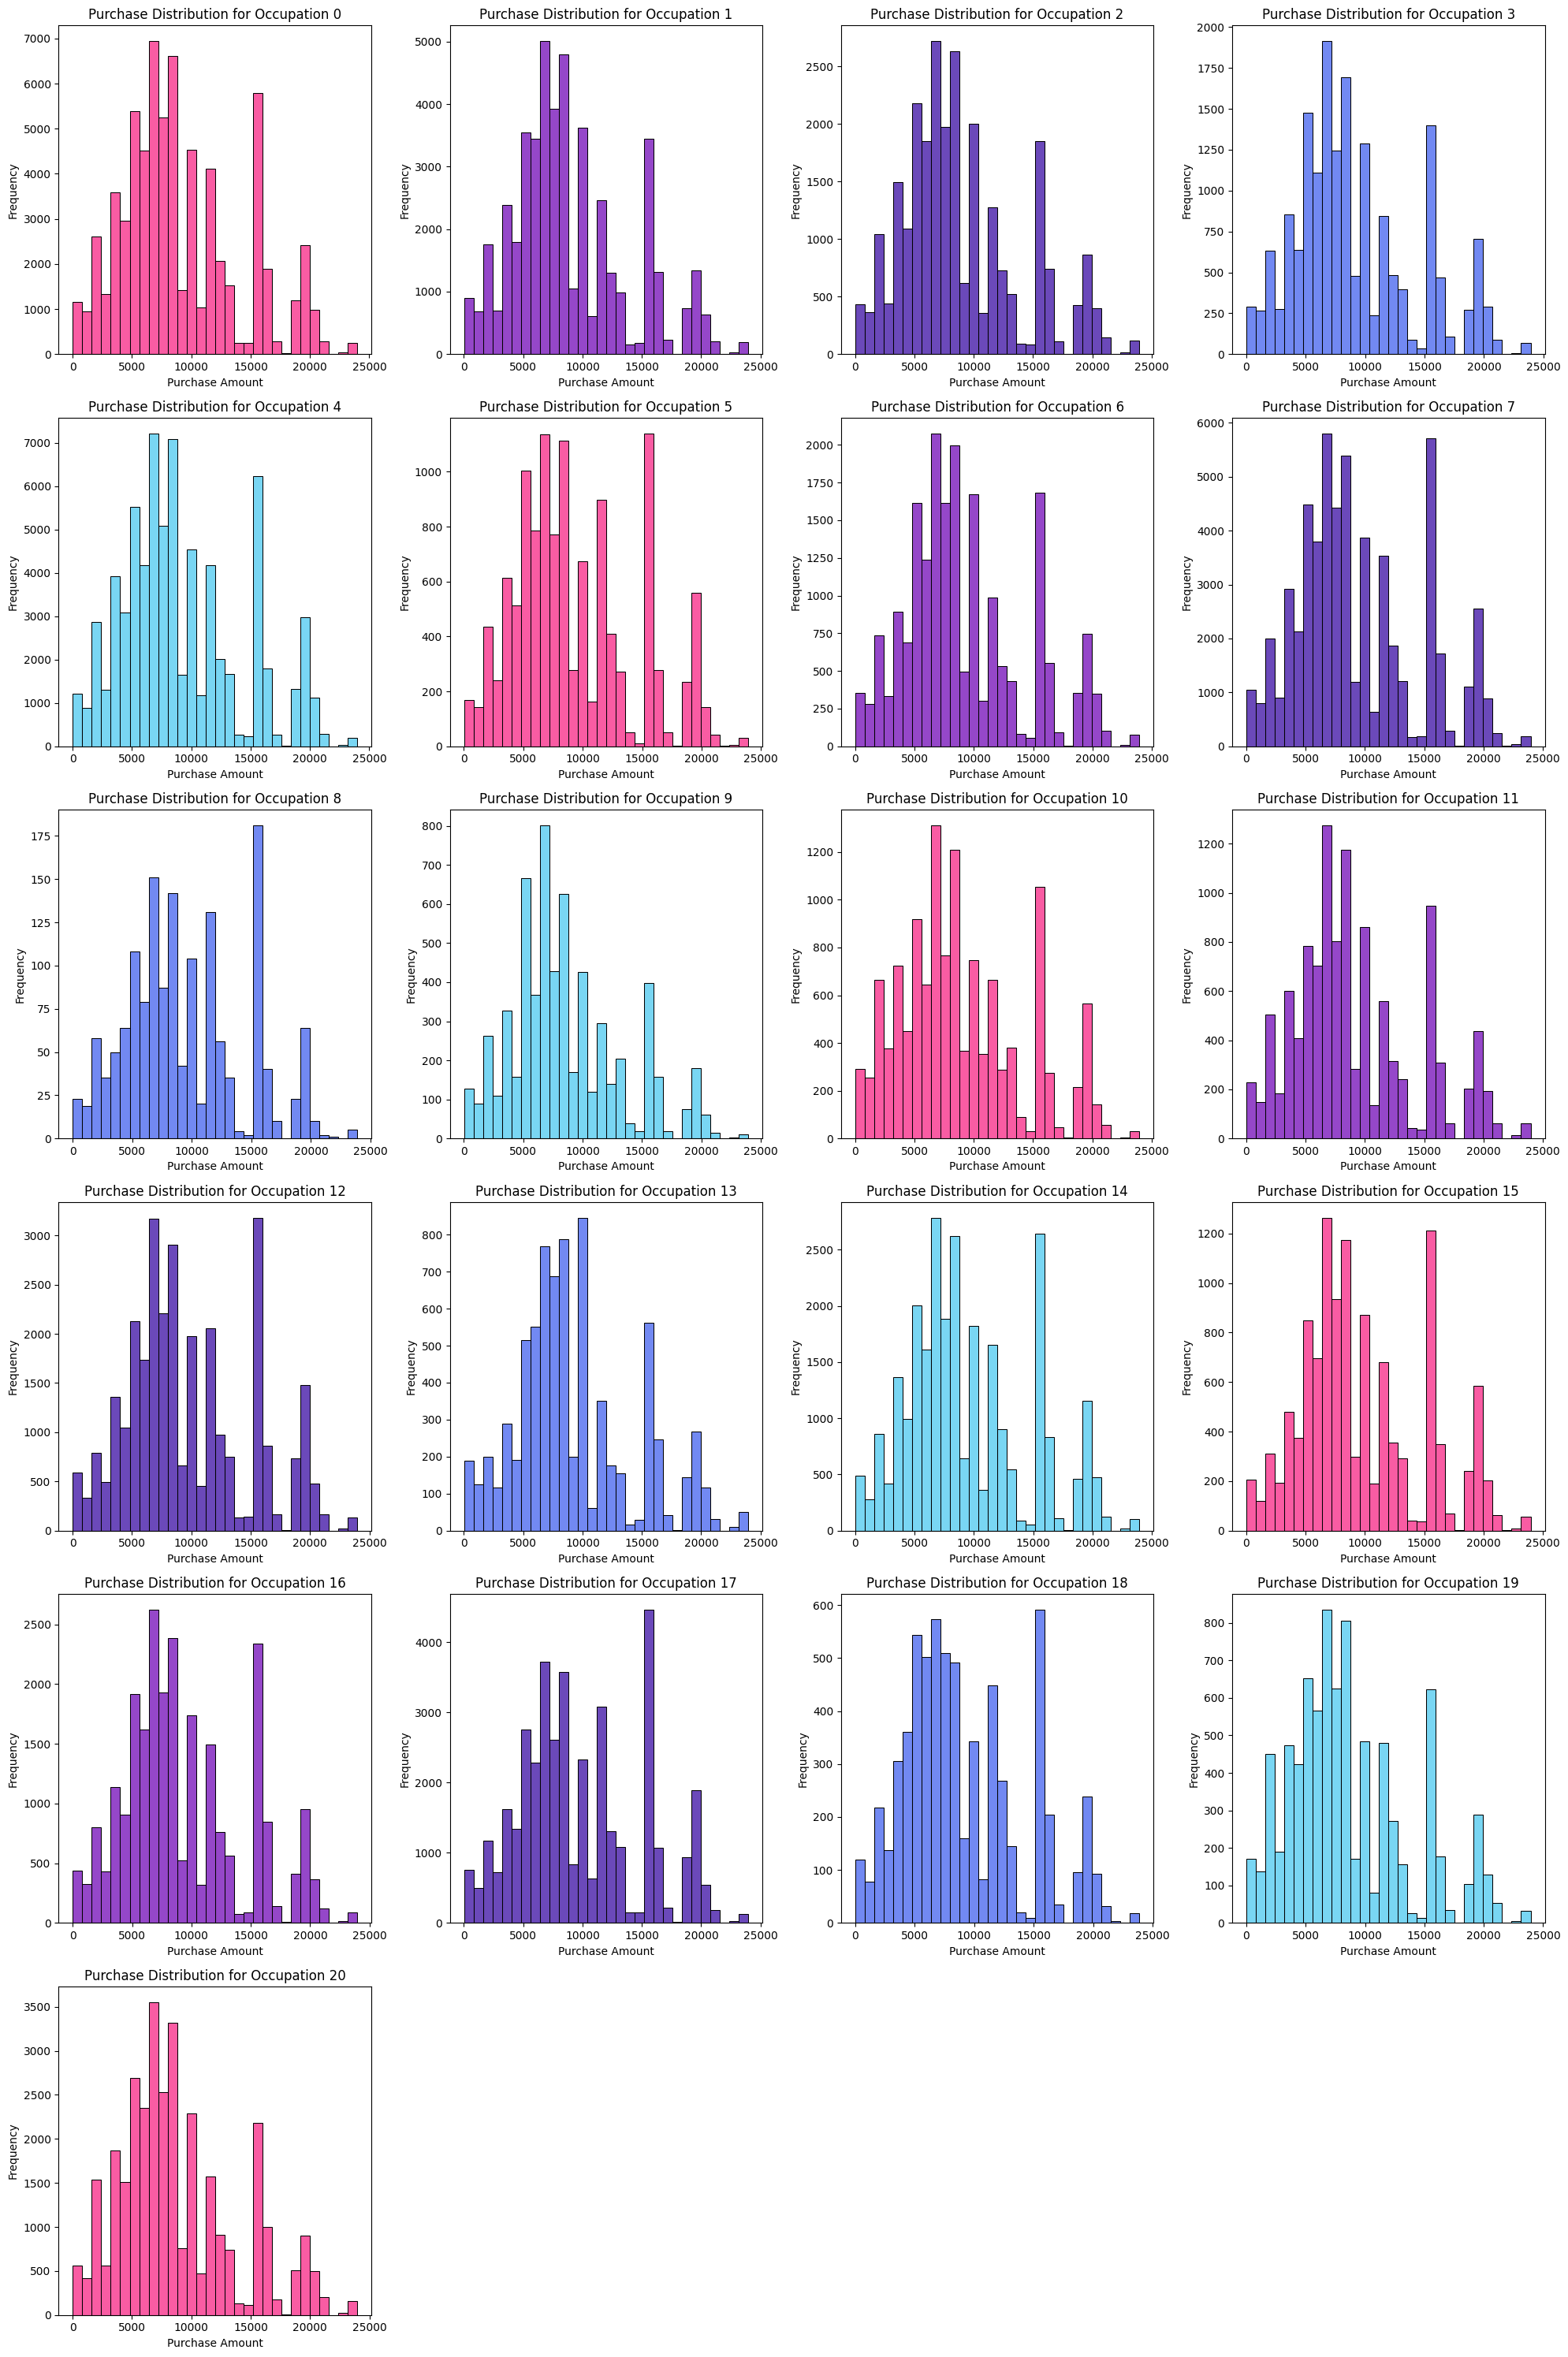

In [26]:
unique_occupations = preprocessed_train_df['Occupation'].unique()
n_rows = -(-len(unique_occupations) // 4)  

colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 5))  
axes = axes.flatten()  
# Plot for occupations
for i, occupation in enumerate(unique_occupations):
    ax = axes[i]
    sns.histplot(preprocessed_train_df[preprocessed_train_df['Occupation'] == occupation]['Purchase'], 
                 ax=ax, color=colors[i%len(colors)], bins=30)
    ax.set_title(f'Purchase Distribution for Occupation {occupation}')
    ax.set_xlabel('Purchase Amount')
    ax.set_ylabel('Frequency')
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

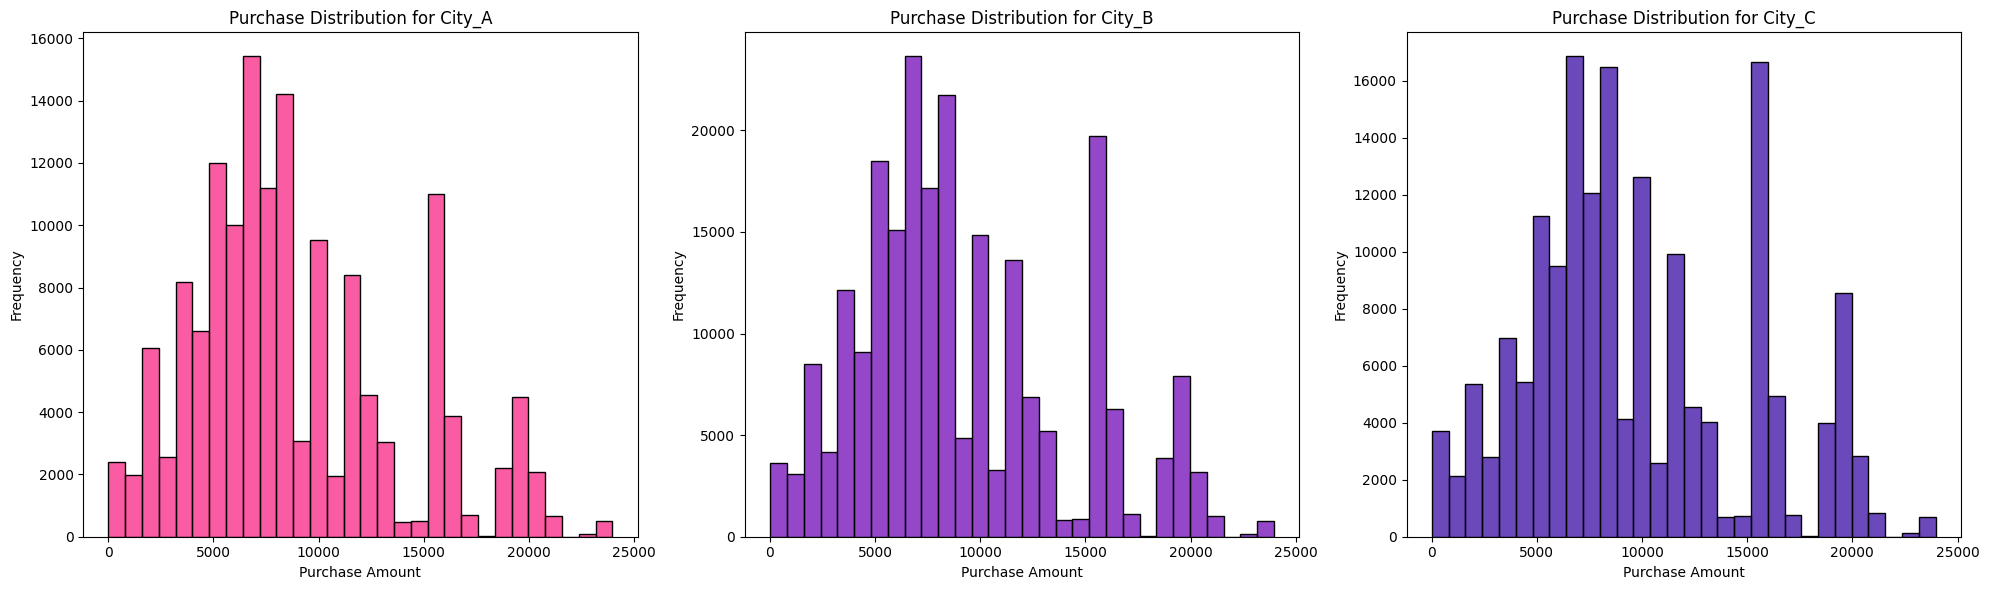

In [27]:
city_categories = ["City_A", "City_B", "City_C"]
n_rows = 1 

colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6*n_rows)) 
axes = axes.flatten() 
# Plot for cities
for i, city_category in enumerate(city_categories):
    ax = axes[i]
    sns.histplot(preprocessed_train_df[preprocessed_train_df[city_category] == 1]['Purchase'], 
                 ax=ax, color=colors[i%len(colors)], bins=30)
    ax.set_title(f'Purchase Distribution for {city_category}')
    ax.set_xlabel('Purchase Amount')
    ax.set_ylabel('Frequency')
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

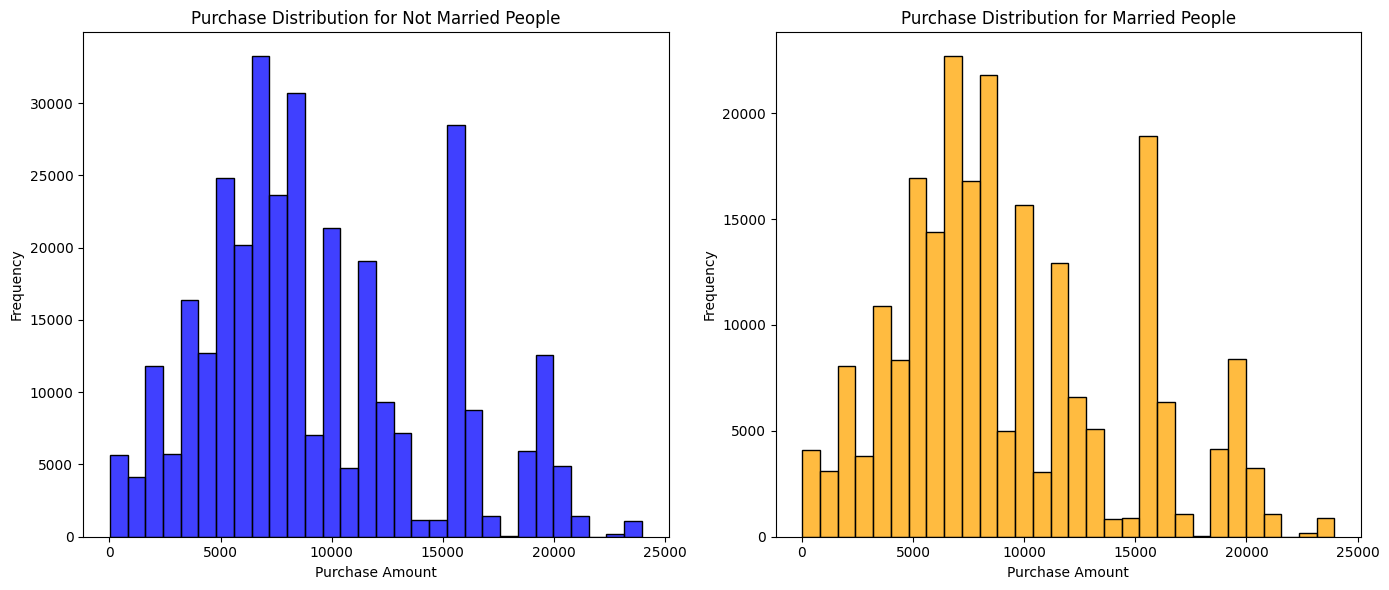

In [28]:
plt.figure(figsize=(14, 6))

# Plot for Not married
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_train_df[preprocessed_train_df['Marital_Status'] == 0]['Purchase'], color='blue', bins=30)
plt.title('Purchase Distribution for Not Married People')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Plot for married
plt.subplot(1, 2, 2)
sns.histplot(preprocessed_train_df[preprocessed_train_df['Marital_Status'] == 1]['Purchase'], color='orange', bins=30)
plt.title('Purchase Distribution for Married People')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

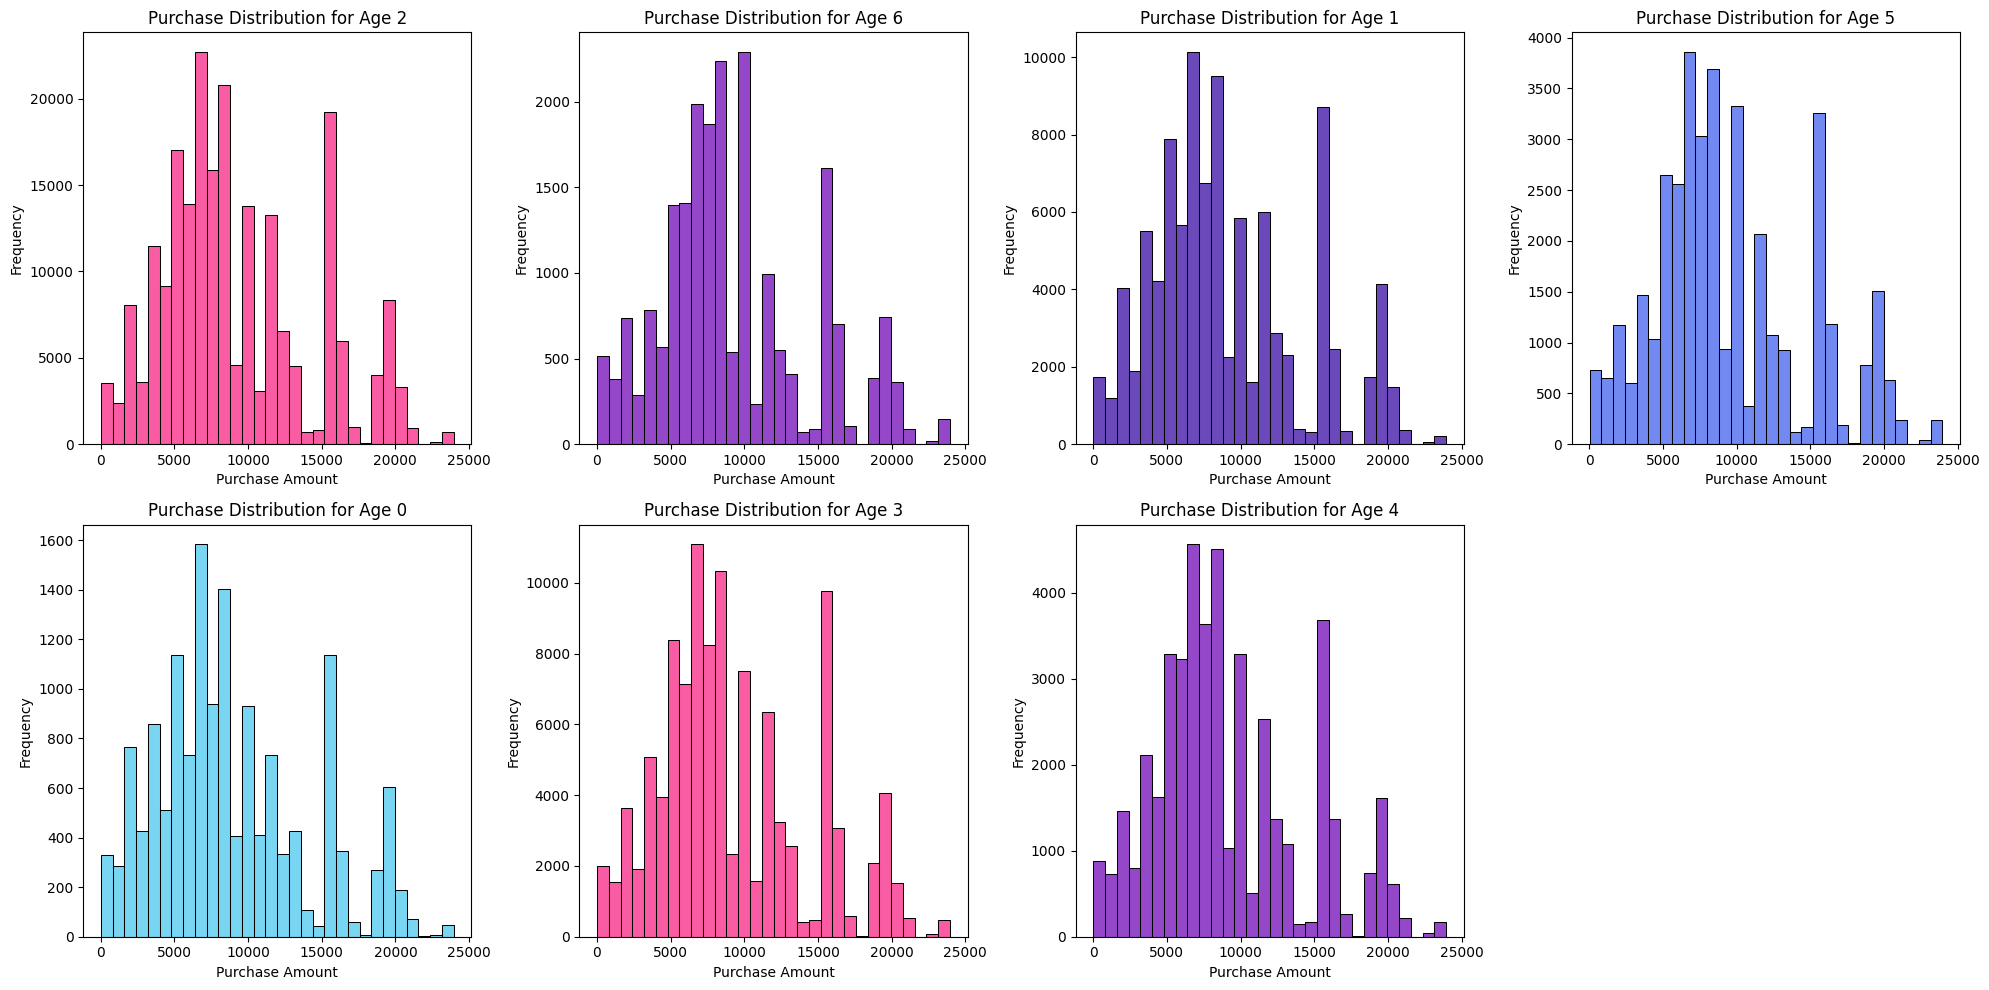

In [24]:
unique_ages = preprocessed_train_df['Age'].unique()
n_rows = -(-len(unique_ages) // 4)  

colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 5)) 
axes = axes.flatten() 
# Plot for ages
for i, age in enumerate(unique_ages):
    ax = axes[i]
    sns.histplot(preprocessed_train_df[preprocessed_train_df['Age'] == age]['Purchase'], 
                 ax=ax, color=colors[i%len(colors)], bins=30)
    ax.set_title(f'Purchase Distribution for Age {age}')
    ax.set_xlabel('Purchase Amount')
    ax.set_ylabel('Frequency')
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

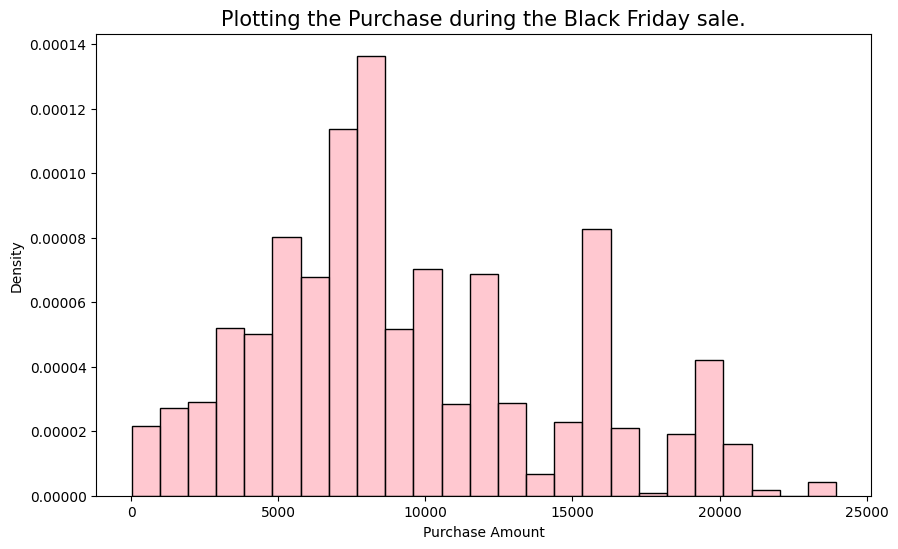

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Plotting the Purchase during the Black Friday sale.', size=15)
sns.histplot(preprocessed_train_df['Purchase'], bins=25, color='lightpink', stat='density')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

In [27]:
# plt.figure(figsize=(10, 6))
# plt.title('Plotting the Purchase during the Black Friday sale.', size = 15)
# sns.distplot(train_df['Purchase'], bins=25 , color ='lightpink')


### Save Preprocessed Tables to BigQuery

In [28]:
# Define the destination table. Replace 'your_table_name' with the actual table name
train_table_id = "aa-ai-specialisation.black_friday.preprocessed_train_df"
test_table_id = "aa-ai-specialisation.black_friday.preprocessed_test_df"

In [29]:
# Using BigQuery SDK 

# # Define job configuration. Since the schema is auto-detected, we don't need to define it.
# job_config = bigquery.LoadJobConfig(
#     autodetect=True,
#     write_disposition="WRITE_TRUNCATE",  # Overwrites the table if it exists
# )

# # Load the DataFrame to BigQuery
# train_job = client.load_table_from_dataframe(
#     preprocessed_train_df, train_table_id, job_config=job_config
# )  # Make an API request.
# test_job = client.load_table_from_dataframe(
#     preprocessed_test_df, test_table_id, job_config=job_config
# )  # Make an API request.

# # Wait for the jobs to complete
# train_job.result()  # Waits for the job to finish
# test_job.result()  # Waits for the job to finish

# print("The DataFrames are successfully saved to BigQuery.")


In [31]:
# Or using pandas-gbq
pandas_gbq.to_gbq(preprocessed_train_df, train_table_id, project_id=PROJECT)
pandas_gbq.to_gbq(preprocessed_test_df, test_table_id, project_id=PROJECT)

100%|██████████| 1/1 [00:00<00:00, 8577.31it/s]


## Conclusion
- There are significant number of missing values in the column Product_Category_2        and Product_Category_3.

- Based on series of analysis, simply impute the missing values may lead to bias.

- An missing indicator column was created.

- Some preprocessing approaches are applied.

- The features data on the `Geneder` column is imbalanced, but observing their distribution aginst with `Purchase` are similar, this would not be an issue.



In [30]:
from sklearn import datasets
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

X = preprocessed_train_df.drop(columns=['Purchase', 'Product_ID'], axis=1)
y = list(preprocessed_train_df['Purchase'])
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, y)

In [ ]:
fit

In [32]:
X_new=test.fit_transform(X, y)

In [ ]:
preprocessed_train_df

In [33]:
test.scores_

array([7.33771036e-02, 5.31947284e-03, 5.01677887e-03, 8.47526927e-03,
       3.53351853e-04, 0.00000000e+00, 1.66653440e+00, 5.29778361e-01,
       2.35776867e-01, 1.08422270e-01, 1.21684730e-01, 1.53227595e-03,
       1.32418750e-03, 3.84602566e-03])

In [34]:
feature_names = X.columns

In [36]:
features_scores = zip(feature_names, test.scores_)
sorted_features_scores = sorted(features_scores, key=lambda x: x[1], reverse=True)
for feature, score in sorted_features_scores:
    print(f"Feature: {feature}, Score: {score}")

Feature: Product_Category_1, Score: 1.6665344048870918
Feature: Product_Category_2, Score: 0.529778361162013
Feature: Product_Category_3, Score: 0.2357768674666394
Feature: missing_Product_Category_3, Score: 0.12168473019473902
Feature: missing_Product_Category_2, Score: 0.10842227049879227
Feature: User_ID, Score: 0.0733771035840114
Feature: Occupation, Score: 0.008475269267577357
Feature: Gender, Score: 0.00531947283996459
Feature: Age, Score: 0.005016778869037619
Feature: City_C, Score: 0.0038460256561503314
Feature: City_A, Score: 0.0015322759547324871
Feature: City_B, Score: 0.0013241875022309557
Feature: Stay_In_Current_City_Years, Score: 0.00035335185305340744
Feature: Marital_Status, Score: 0.0
